In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 21.2 MB/s eta 0:00:0000:01


In [2]:
from ultralytics import YOLO
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import os
from torchvision import transforms
import torch.nn.functional as F
from datetime import datetime
import random
import math

In [10]:
yolo = YOLO("/kaggle/input/deeplearningproject/best.pt", verbose = False)

In [5]:
def count_people_from_yolo(image_path, model):
    # Perform inference
    results = model(image_path, verbose = False)
    
    # Access the first result in the list of results
    detections = results[0]
    
    # Extract bounding boxes and class IDs
    class_ids = detections.boxes.cls.cpu().numpy()  # Class IDs
    
    # Count the number of people detected
    person_count = sum(class_id == 0 for class_id in class_ids)  # Class ID 0 for 'person'
    
    return person_count

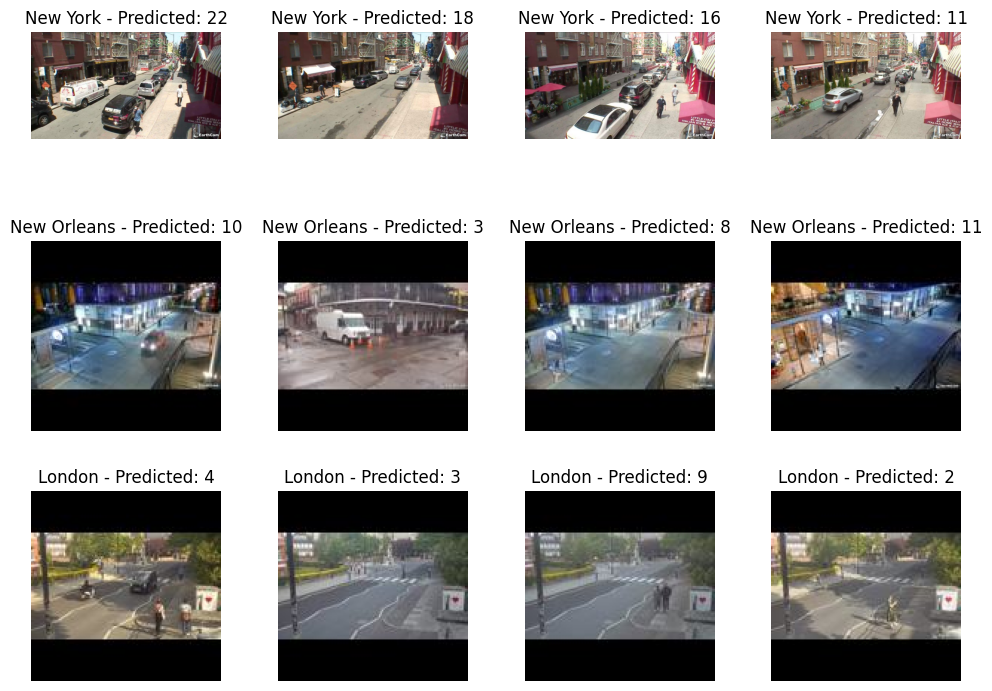

In [13]:
# Define paths to image folders
folder_paths = {
    'New York': '/kaggle/input/deeplearningproject/data_analysis/data_analysis/Filtered_Images/NewYork_filtered',
    'New Orleans': '/kaggle/input/deeplearningproject/data_analysis/data_analysis/Filtered_Images/NewOrleans_filtered',
    'London': '/kaggle/input/deeplearningproject/data_analysis/data_analysis/Filtered_Images/London_filtered'
}

# visualize how model works on the images

# visualize how model works on the images
def visualize_prediction(model, year, number_of_images_per_city=2):

    all_image_files = []
    
    for city, image_dir in folder_paths.items():
        city_image_files = []
        
        for filename in os.listdir(image_dir):
            if filename.endswith(".jpg"):
                parts = filename.split('_')
                date = parts[1]
                file_year = date.split('-')[-1]
                if file_year == year:
                    city_image_files.append((city, filename))
        
        if len(city_image_files) >= number_of_images_per_city:
            # Randomly select the specified number of images for this city
            selected_images = random.sample(city_image_files, number_of_images_per_city)
            all_image_files.extend(selected_images)
        else:
            # In case there are fewer images than required, select all
            all_image_files.extend(city_image_files)

    total_images = len(all_image_files)
    rows = math.ceil(total_images / 4)
    cols = min(4, total_images)

    fig, axes = plt.subplots(rows, cols, figsize=(12, 3 * rows))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, (city, filename) in enumerate(all_image_files):
        image_dir = folder_paths[city]
        image_path = os.path.join(image_dir, filename)
        
        # Load and preprocess the image
        image = Image.open(image_path).convert('RGB')

        # Predict using the model
        predicted_count = count_people_from_yolo(image_path, model)

        # Determine the correct axis for single or multiple rows/columns
        if rows == 1 and cols == 1:
            ax = axes
        elif rows == 1 or cols == 1:
            ax = axes[i]
        else:
            ax = axes[i // cols, i % cols]

        # Display the image with title showing city and predicted count
        ax.imshow(image)
        ax.set_title(f"{city} - Predicted: {int(predicted_count)}")
        ax.axis('off')

    plt.show()

# Visualize the prediction for images from each city
visualize_prediction(yolo, "2020", number_of_images_per_city=4)

In [15]:
results = {
    "London": {
        "2019": {"05-01-2019": [], "05-02-2019": [], "05-03-2019": [], "05-04-2019": [],
                 "05-05-2019": [], "05-06-2019": [], "05-07-2019": [], "05-08-2019": [],
                 "05-09-2019": [], "05-10-2019": [], "05-11-2019": [], "05-12-2019": [],
                 "05-13-2019": [], "05-14-2019": []},
        "2020": {"05-01-2020": [], "05-02-2020": [], "05-03-2020": [], "05-04-2020": [],
                 "05-05-2020": [], "05-06-2020": [], "05-07-2020": [], "05-08-2020": [],
                 "05-09-2020": [], "05-10-2020": [], "05-11-2020": [], "05-12-2020": [],
                 "05-13-2020": [], "05-14-2020": []},
        "2022": {"05-01-2022": [], "05-02-2022": [], "05-03-2022": [], "05-04-2022": [],
                 "05-05-2022": [], "05-06-2022": [], "05-07-2022": [], "05-08-2022": [],
                 "05-09-2022": [], "05-10-2022": [], "05-11-2022": [], "05-12-2022": [],
                 "05-13-2022": [], "05-14-2022": []}
    },
    "New York": {
        "2019": {"06-16-2019": [], "06-17-2019": [], "06-18-2019": [], "06-19-2019": [],
                 "06-20-2019": [], "06-21-2019": [], "06-22-2019": [], "06-23-2019": [],
                 "06-24-2019": [], "06-25-2019": [], "06-26-2019": [], "06-27-2019": [],
                 "06-28-2019": [], "06-29-2019": []},
        "2020": {"06-16-2020": [], "06-17-2020": [], "06-18-2020": [], "06-19-2020": [],
                 "06-20-2020": [], "06-21-2020": [], "06-22-2020": [], "06-23-2020": [],
                 "06-24-2020": [], "06-25-2020": [], "06-26-2020": [], "06-27-2020": [],
                 "06-28-2020": [], "06-29-2020": []},
        "2022": {"06-16-2022": [], "06-17-2022": [], "06-18-2022": [], "06-19-2022": [],
                 "06-20-2022": [], "06-21-2022": [], "06-22-2022": [], "06-23-2022": [],
                 "06-24-2022": [], "06-25-2022": [], "06-26-2022": [], "06-27-2022": [],
                 "06-28-2022": [], "06-29-2022": []}
    },
    "New Orleans": {
        "2019": {"05-13-2019": [], "05-14-2019": [], "05-15-2019": [], "05-16-2019": [],
                 "05-17-2019": [], "05-18-2019": [], "05-19-2019": [], "05-20-2019": [],
                 "05-21-2019": [], "05-22-2019": [], "05-23-2019": [], "05-24-2019": [],
                 "05-25-2019": [], "05-26-2019": []},
        "2020": {"05-13-2020": [], "05-14-2020": [], "05-15-2020": [], "05-16-2020": [],
                 "05-17-2020": [], "05-18-2020": [], "05-19-2020": [], "05-20-2020": [],
                 "05-21-2020": [], "05-22-2020": [], "05-23-2020": [], "05-24-2020": [],
                 "05-25-2020": [], "05-26-2020": []},
        "2022": {"05-13-2022": [], "05-14-2022": [], "05-15-2022": [], "05-16-2022": [],
                 "05-17-2022": [], "05-18-2022": [], "05-19-2022": [], "05-20-2022": [],
                 "05-21-2022": [], "05-22-2022": [], "05-23-2022": [], "05-24-2022": [],
                 "05-25-2022": [], "05-26-2022": []}
    }
}

for city, path in folder_paths.items():
    
    for filename in os.listdir(path):
        if filename.endswith(".jpg"):
            parts = filename.split('_')
            city_name = parts[0]
            date = parts[1]
            year = date.split('-')[-1]
            
            image_path = os.path.join(path, filename)
            image = Image.open(image_path).convert('RGB')
            count = count_people_from_yolo(image_path, yolo)
            
            if year in results[city]:
                results[city][year][date].append(count)

In [16]:
averages = {}

for city, years in results.items():
    averages[city] = {}
    for year, days in years.items():
        averages[city][year] = {}
        for day, counts in days.items():
            avg_count = sum(counts) / len(counts)
            averages[city][year][day] = avg_count

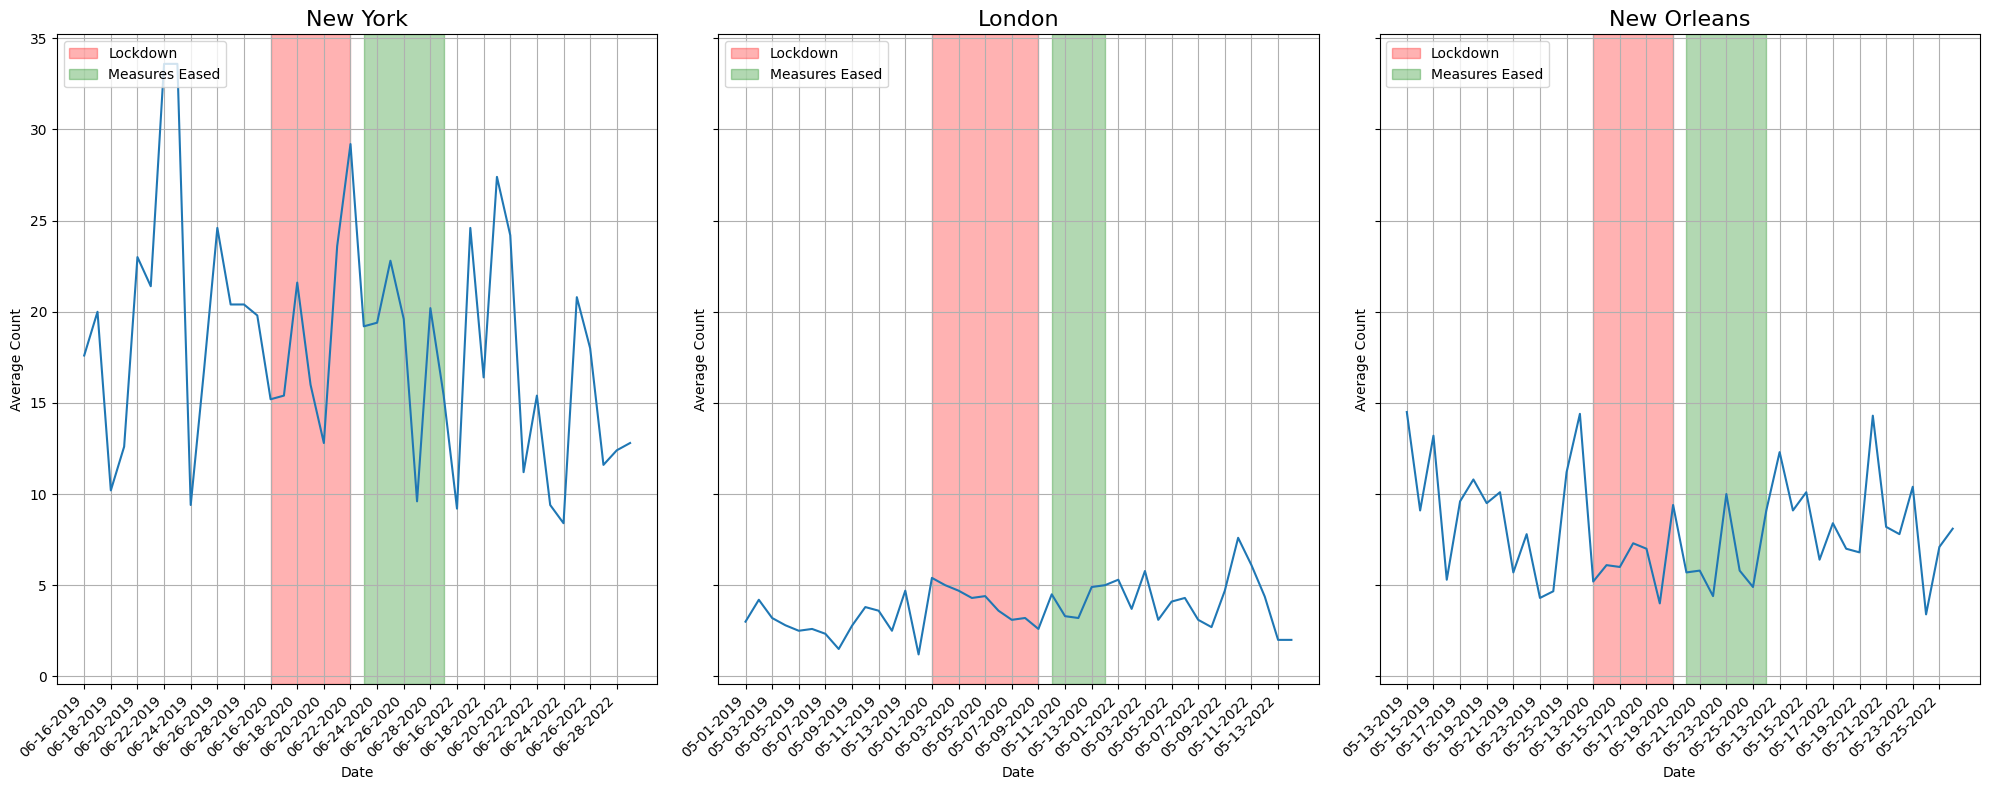

In [17]:
def flatten_averages(averages):
    flattened = []
    for city, years in averages.items():
        for year, date in years.items():
            for date, avg_count in date.items():
                flattened.append((city, date, avg_count))
    return flattened

data = flatten_averages(averages)

fig, axs = plt.subplots(1, 3, figsize=(20, 8), sharex=False, sharey=True)

cities = ['New York', 'London', 'New Orleans']

lockdown_first_date = {"London": "05-01-2020",
                    "New York": "06-16-2020",
                    "New Orleans": "05-13-2020"}
lockdown_last_date = {"London": "05-09-2020",
                   "New York": "06-22-2020",
                   "New Orleans": "05-19-2020"}
lockdowneasing_first_date = {"London": "05-10-2020",
                           "New York": "06-23-2020",
                           "New Orleans": "05-20-2020"}
lockdowneasing_last_date = {"London": "05-14-2020",
                           "New York": "06-29-2020",
                           "New Orleans": "05-26-2020"}

for i, city in enumerate(cities):
    city_data = [(date, avg_count) for c, date, avg_count in data if c == city]
    
    if city_data:
        dates, counts = zip(*city_data)
        axs[i].plot(dates, counts)
        axs[i].set_title(f'{city}', fontsize=16)
        axs[i].set_xlabel('Date')
        axs[i].set_ylabel('Average Count')
        axs[i].grid(True)
        axs[i].set_xticks(dates[::len(dates)//21])
        plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45, ha='right')
        axs[i].axvspan(lockdown_first_date[city], lockdown_last_date[city], color="red", alpha=0.3, label="Lockdown")
        axs[i].axvspan(lockdowneasing_first_date[city], lockdowneasing_last_date[city], color="green", alpha=0.3, label="Measures Eased")
        axs[i].legend(loc='upper left')

plt.tight_layout()
plt.show()